# Projekt Klasyfikacji: Global AI Job Market & Salary Trends 2025

## Opis danych i motywacja

W projekcie wykorzystuję zbiór danych „Global AI Job Market & Salary Trends 2025", obejmujący ponad 15 000 ofert pracy z branży sztucznej inteligencji, zebranych w latach 2024–2025 z największych platform (m.in. LinkedIn, Indeed, Glassdoor) przy pomocy webscrapingu. Dane obejmują szczegółowe informacje o stanowiskach, wynagrodzeniach, wymaganych umiejętnościach, poziomie doświadczenia, trybie pracy (stacjonarna/zdalna/hybrydowa), wielkości firmy i lokalizacji. 

Wybrałem ten zbiór, ponieważ pozwala analizować aktualne trendy na globalnym rynku pracy AI, a także budować modele klasyfikacyjne przydatne do automatycznej analizy ofert – co jest wartościowe zarówno dla kandydatów, jak i rekruterów.


In [333]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("Set2")


In [334]:
df = pd.read_csv('ai_job_dataset.csv')

print("Kształt danych:", df.shape)
print("\nKolumny:", df.columns.tolist())
print("\nTypy danych:")
print(df.dtypes)


Kształt danych: (15000, 19)

Kolumny: ['job_id', 'job_title', 'salary_usd', 'salary_currency', 'experience_level', 'employment_type', 'company_location', 'company_size', 'employee_residence', 'remote_ratio', 'required_skills', 'education_required', 'years_experience', 'industry', 'posting_date', 'application_deadline', 'job_description_length', 'benefits_score', 'company_name']

Typy danych:
job_id                     object
job_title                  object
salary_usd                  int64
salary_currency            object
experience_level           object
employment_type            object
company_location           object
company_size               object
employee_residence         object
remote_ratio                int64
required_skills            object
education_required         object
years_experience            int64
industry                   object
posting_date               object
application_deadline       object
job_description_length      int64
benefits_score            f

## Eksploracyjna Analiza Danych (EDA)


In [335]:
df.head(10)


,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics
5,AI00006,AI Architect,123574,EUR,SE,CT,Germany,M,Germany,50,"Data Visualization, R, SQL, Linux",Associate,7,Healthcare,2024-08-31,2024-10-04,819,5.9,Neural Networks Co
6,AI00007,Principal Data Scientist,79670,GBP,MI,FL,United Kingdom,S,United Kingdom,0,"R, Docker, MLOps",Associate,3,Gaming,2024-12-29,2025-02-28,1936,6.3,DataVision Ltd
7,AI00008,NLP Engineer,70640,EUR,EN,FL,France,L,France,0,"Python, SQL, Computer Vision, Java, Azure",Master,0,Healthcare,2024-06-07,2024-07-01,1286,7.6,Cloud AI Solutions
8,AI00009,Data Analyst,160710,USD,SE,CT,Singapore,L,Singapore,0,"Hadoop, Git, Mathematics, Python",PhD,7,Government,2024-11-04,2024-11-24,551,9.3,Quantum Computing Inc
9,AI00010,AI Software Engineer,102557,USD,SE,PT,Austria,M,Austria,0,"MLOps, GCP, Scala, Azure, Linux",Master,5,Government,2024-10-20,2024-11-06,2340,5.8,Cloud AI Solutions


In [336]:
df.info()

print("\nPodsumowanie statystyczne:")
display(df.describe(include='all'))

print("\nSprawdzenie braków danych:")
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])  #Pokaż tylko kolumny z brakami

if missing_data.sum() == 0:
    print("Brak brakujących wartośc")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
count,15000,15000,15000.000000,15000,15000,15000,15000,15000,15000,15000.000000,15000,15000,15000.000000,15000,15000,15000,15000.000000,15000.000000,15000
unique,15000,20,NaN,3,4,4,20,3,20,NaN,13663,4,NaN,15,486,543,NaN,NaN,16
top,AI00001,Machine Learning Researcher,NaN,USD,MI,FT,Germany,S,Sweden,NaN,"Python, TensorFlow, PyTorch",Bachelor,NaN,Retail,2024-07-05,2025-01-05,NaN,NaN,TechCorp Inc
freq,1,808,NaN,11957,3781,3812,814,5007,790,NaN,17,3789,NaN,1063,51,47,NaN,NaN,980
mean,NaN,NaN,115348.965133,NaN,NaN,NaN,NaN,NaN,NaN,49.483333,NaN,NaN,6.253200,NaN,NaN,NaN,1503.314733,7.504273,NaN
std,NaN,NaN,60260.940438,NaN,NaN,NaN,NaN,NaN,NaN,40.812712,NaN,NaN,5.545768,NaN,NaN,NaN,576.127083,1.450870,NaN
min,NaN,NaN,32519.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,500.000000,5.000000,NaN
25%,NaN,NaN,70179.750000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,2.000000,NaN,NaN,NaN,1003.750000,6.200000,NaN
50%,NaN,NaN,99705.000000,NaN,NaN,NaN,NaN,NaN,NaN,50.000000,NaN,NaN,5.000000,NaN,NaN,NaN,1512.000000,7.500000,NaN
75%,NaN,NaN,146408.500000,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,10.000000,NaN,NaN,NaN,2000.000000,8.800000,NaN



Sprawdzenie braków danych:
Series([], dtype: int64)
Brak brakujących wartośc


In [337]:
#Sprawdzenie unikalnych wartości w kluczowych kolumnach
print("Unikalne wartości w kluczowych kolumnach:")
for col in ['experience_level', 'employment_type', 'company_size', 'remote_ratio']:
    print(f"\n{col}: {df[col].unique()}")


Unikalne wartości w kluczowych kolumnach:

experience_level: ['SE' 'EN' 'MI' 'EX']

employment_type: ['CT' 'FL' 'PT' 'FT']

company_size: ['M' 'L' 'S']

remote_ratio: [ 50 100   0]


In [338]:
#Mapowanie skrótów na pełne nazwy
level_mapping = {
    'EN': 'Entry',
    'MI': 'Mid', 
    'SE': 'Senior',
    'EX': 'Executive'
}
df['experience_level_full'] = df['experience_level'].map(level_mapping)

employment_type_mapping = {
    'FT': 'Full-time',
    'PT': 'Part-time',
    'CT': 'Contract', 
    'FL': 'Freelance'
}
df['employment_type_full'] = df['employment_type'].map(employment_type_mapping)

#brak zmiany w company_size, ponieważ S - M - L wydaje się całekim logiczne

In [339]:
#Usunięcie niepotrzebnych kolumn
columns_to_drop = ['job_id', 'posting_date', 'application_deadline',  'salary_currency']
df_cleaned = df.drop(columns=columns_to_drop)
print(f"Usunięto kolumny: {columns_to_drop}")
print(f"Pozostało kolumn: {len(df_cleaned.columns)}")

#salary_currency - niepotrzebne skoro jest juz salary_usd
#application_deadline - nieistotny 
#posting_date - nieistotne
#job_id - nic nie wnosi 

Usunięto kolumny: ['job_id', 'posting_date', 'application_deadline', 'salary_currency']
Pozostało kolumn: 17


In [340]:
df_cleaned.head()

,job_title,salary_usd,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,job_description_length,benefits_score,company_name,experience_level_full,employment_type_full
0,AI Research Scientist,90376,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,1076,5.9,Smart Analytics,Senior,Contract
1,AI Software Engineer,61895,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,1268,5.2,TechCorp Inc,Entry,Contract
2,AI Specialist,152626,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,1974,9.4,Autonomous Tech,Mid,Freelance
3,NLP Engineer,80215,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,1345,8.6,Future Systems,Senior,Freelance
4,AI Consultant,54624,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,1989,6.6,Advanced Robotics,Entry,Part-time


In [341]:
#Rozkład doświadczenia/rodzaju zatrudnienia/stanowisk w ofertach pracy
print("Rozkład poziomów doświadczenia:")
display(df_cleaned['experience_level_full'].value_counts().to_frame('count'))

print("\nRozkład typów zatrudnienia:")
display(df_cleaned['employment_type_full'].value_counts().to_frame('count'))

print("\nTop 10 najczęstszych stanowisk:")
display(df_cleaned['job_title'].value_counts().head(10).to_frame('count'))


Rozkład poziomów doświadczenia:


,count
experience_level_full,
Mid,3781
Executive,3760
Senior,3741
Entry,3718



Rozkład typów zatrudnienia:


,count
employment_type_full,
Full-time,3812
Freelance,3758
Contract,3721
Part-time,3709



Top 10 najczęstszych stanowisk:


,count
job_title,
Machine Learning Researcher,808
AI Software Engineer,784
Autonomous Systems Engineer,777
Machine Learning Engineer,772
AI Architect,771
Head of AI,765
NLP Engineer,762
Robotics Engineer,759
Data Analyst,759


### Wizualizacje rozkładów zmiennych liczbowych


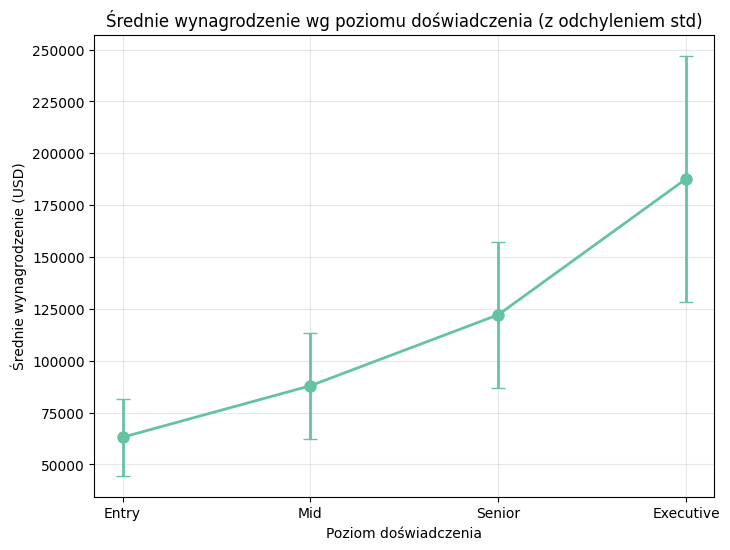

In [342]:
#ustalenie kolejności wg średniego wynagrodzenia
order = df_cleaned.groupby('experience_level_full')['salary_usd'].mean().sort_values().index.tolist()

#Obliczenie średnich i odchyleń standardowych
stats = df_cleaned.groupby('experience_level_full')['salary_usd'].agg(['mean', 'std']).reindex(order)

plt.figure(figsize=(8, 6))
plt.errorbar(order, stats['mean'], yerr=stats['std'], 
             marker='o', linewidth=2, markersize=8, capsize=5)
plt.title('Średnie wynagrodzenie wg poziomu doświadczenia (z odchyleniem std)')
plt.xlabel('Poziom doświadczenia')
plt.ylabel('Średnie wynagrodzenie (USD)')
plt.grid(True, alpha=0.3)
plt.show()


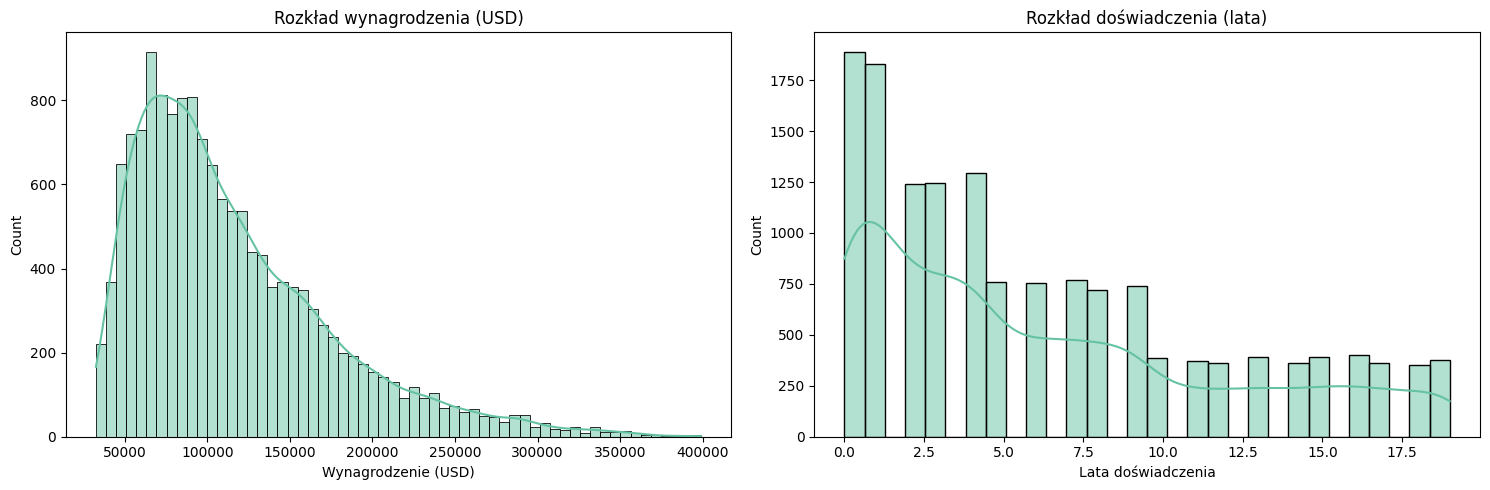

In [343]:
#Rozkład wynagrodzenia i lat doświadczenia
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

#Histogram wynagrodzenia
sns.histplot(df_cleaned['salary_usd'], kde=True, ax=axes[0])
axes[0].set_title('Rozkład wynagrodzenia (USD)')
axes[0].set_xlabel('Wynagrodzenie (USD)')

#Histogram lat doświadczenia
sns.histplot(df_cleaned['years_experience'], kde=True, ax=axes[1])
axes[1].set_title('Rozkład doświadczenia (lata)')
axes[1].set_xlabel('Lata doświadczenia')

plt.tight_layout()
plt.show()


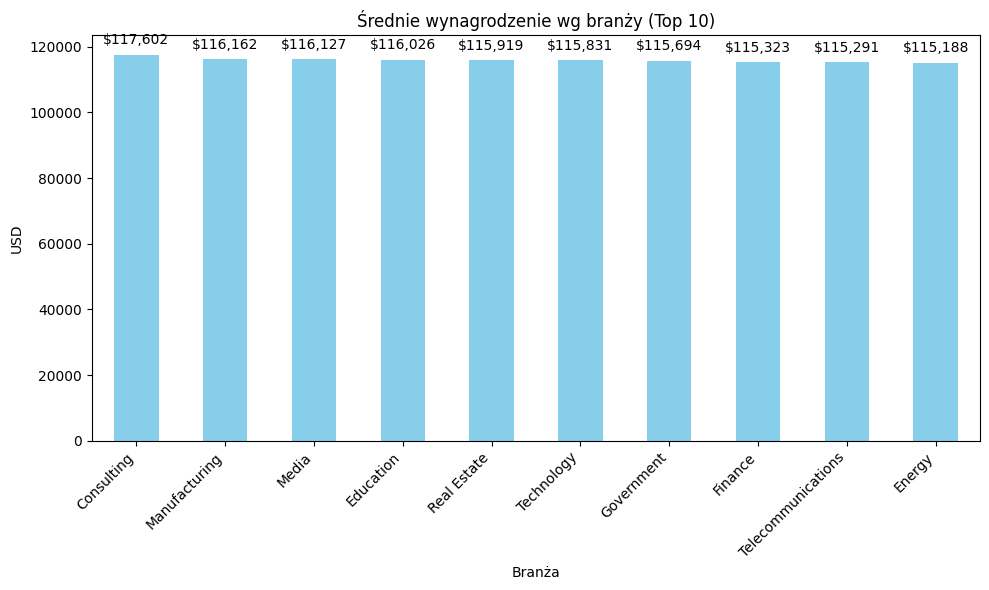

In [344]:
#Średnie wynagrodzenie wg branży 
mean_salary = df_cleaned.groupby('industry')['salary_usd'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
ax = mean_salary.plot(kind='bar', color='skyblue')
plt.title('Średnie wynagrodzenie wg branży (Top 10)')
plt.ylabel('USD')
plt.xlabel('Branża')
plt.xticks(rotation=45, ha='right')

for i, value in enumerate(mean_salary):
    plt.text(i, value * 1.02, f"${int(value):,}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


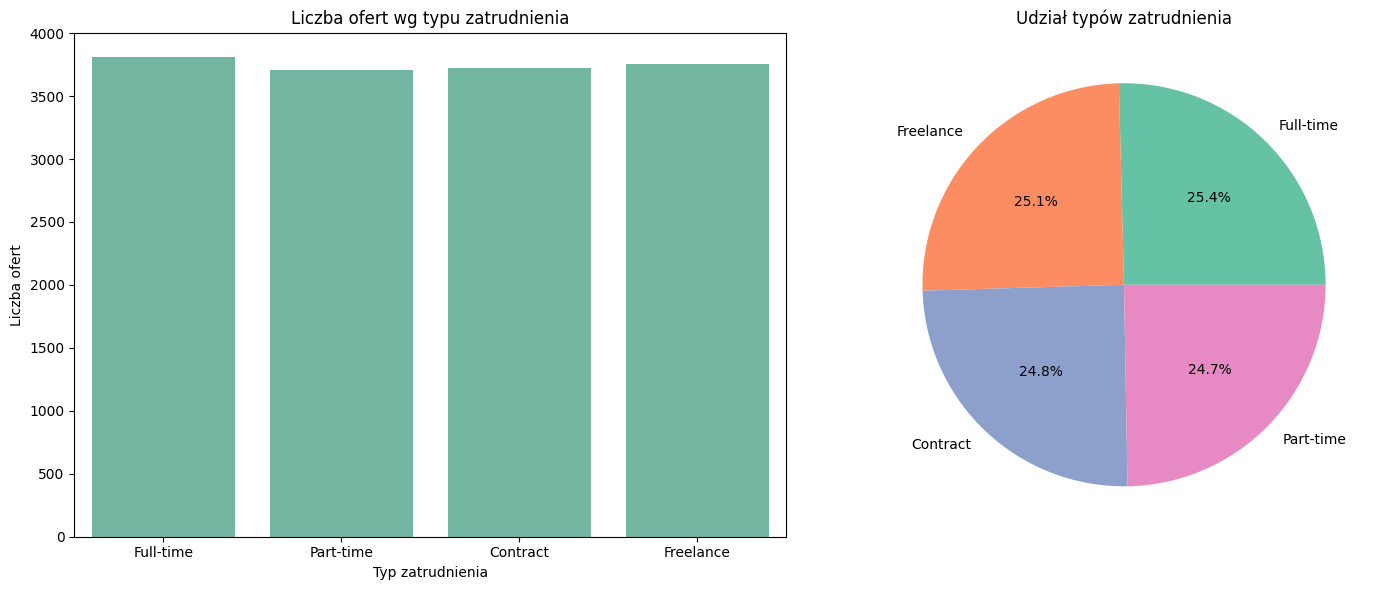

In [345]:
#Liczba ofert wg typu zatrudnienia
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

#bar 
sns.countplot(x='employment_type_full', data=df_cleaned, 
             order=['Full-time', 'Part-time', 'Contract', 'Freelance'], ax=axes[0])
axes[0].set_title('Liczba ofert wg typu zatrudnienia')
axes[0].set_xlabel('Typ zatrudnienia')
axes[0].set_ylabel('Liczba ofert')

#piechart
df['employment_type_full'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[1])
axes[1].set_title('Udział typów zatrudnienia')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()


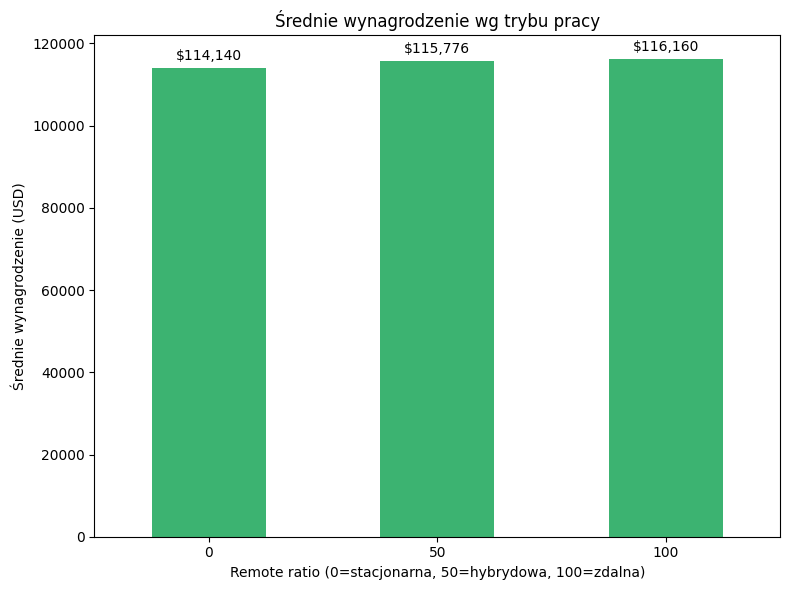

In [346]:
#Średnie wynagrodzenie wg trybu pracy
mean_salary_remote = df_cleaned.groupby('remote_ratio')['salary_usd'].mean().sort_index()

plt.figure(figsize=(8, 6))
mean_salary_remote.plot(kind='bar', color='mediumseagreen')
plt.title('Średnie wynagrodzenie wg trybu pracy')
plt.xlabel('Remote ratio (0=stacjonarna, 50=hybrydowa, 100=zdalna)')
plt.ylabel('Średnie wynagrodzenie (USD)')
plt.xticks(rotation=0)

for i, value in enumerate(mean_salary_remote):
    plt.text(i, value * 1.01, f"${int(value):,}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


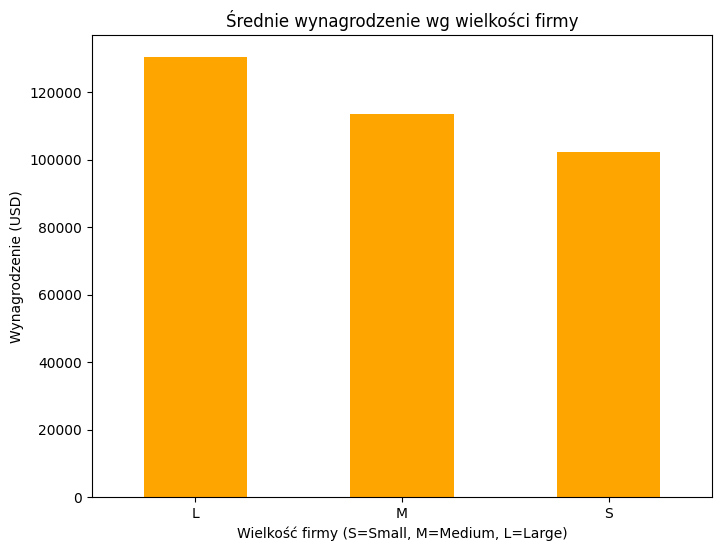

In [347]:
#Średnie wynagrodzenie wg wielkości firmy
mean_salary_size = df_cleaned.groupby('company_size')['salary_usd'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
mean_salary_size.plot(kind='bar', color='orange')
plt.title('Średnie wynagrodzenie wg wielkości firmy')
plt.xlabel('Wielkość firmy (S=Small, M=Medium, L=Large)')
plt.ylabel('Wynagrodzenie (USD)')
plt.xticks(rotation=0)
plt.show()


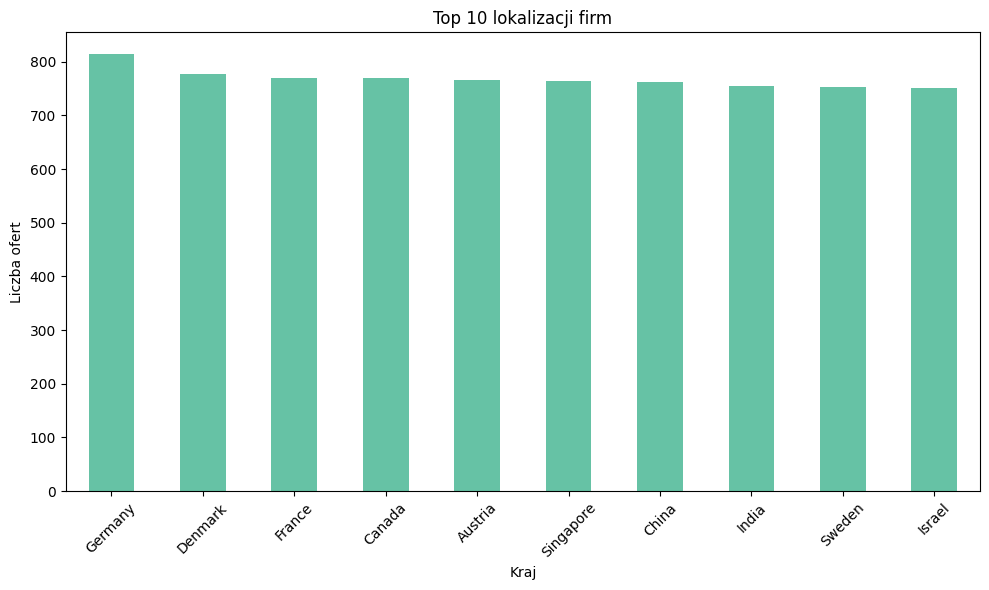

In [348]:
#top 10 lokalizacji firm
plt.figure(figsize=(10, 6))
df_cleaned['company_location'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 lokalizacji firm')
plt.xlabel('Kraj')
plt.ylabel('Liczba ofert')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


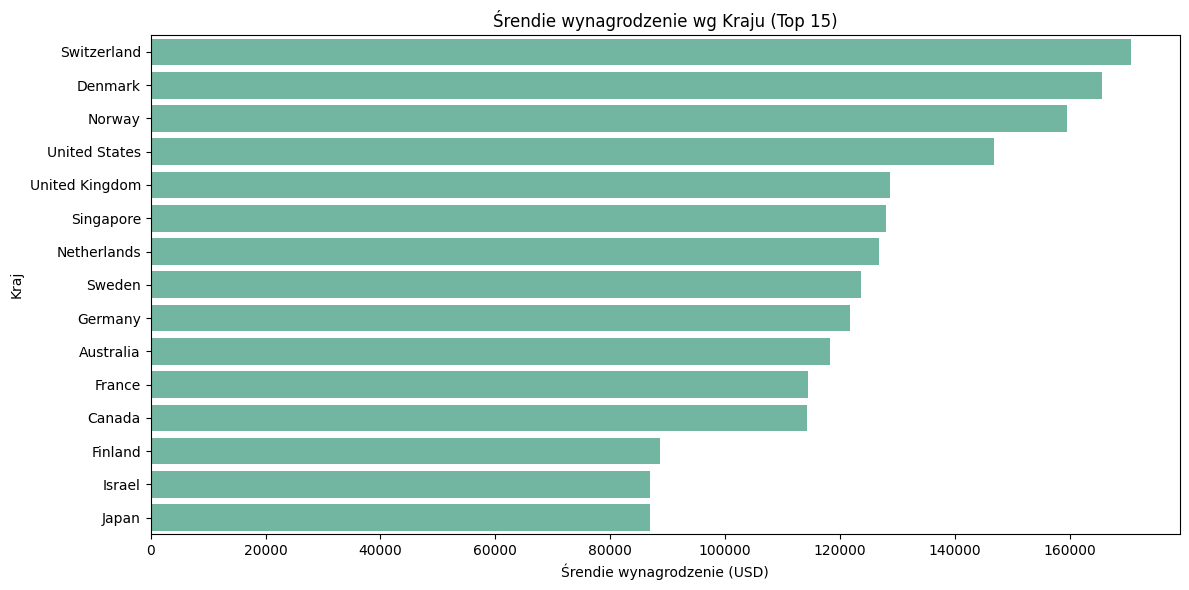

In [349]:
#średnie wynagrodzenie wg kraju top 15
country_avg = df_cleaned.groupby("company_location")["salary_usd"].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(12, 6))
sns.barplot(x=country_avg.values, y=country_avg.index)
plt.title("Śrendie wynagrodzenie wg Kraju (Top 15)")
plt.xlabel("Śrendie wynagrodzenie (USD)")
plt.ylabel("Kraj")
plt.tight_layout()
plt.show()

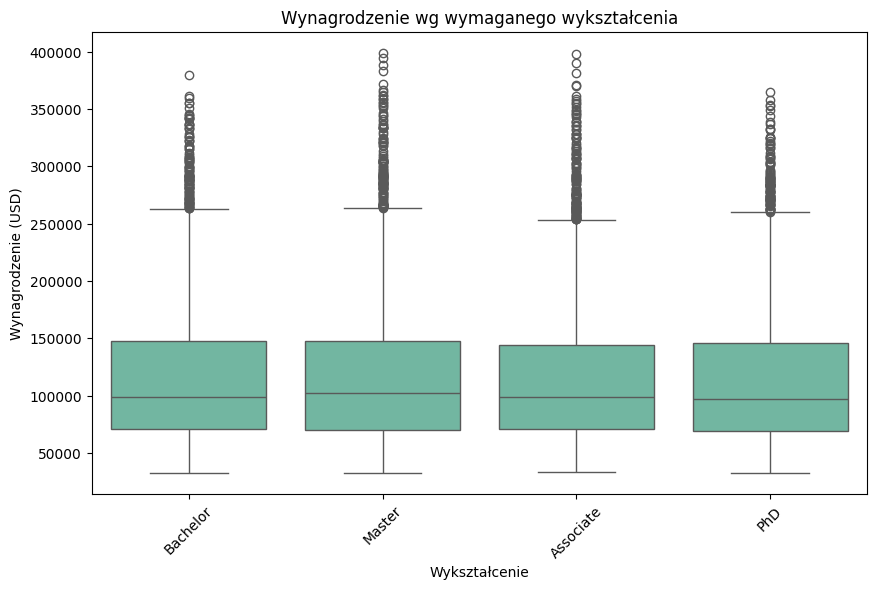

In [350]:
#Wynagrodzenie wg wykształcenia
plt.figure(figsize=(10, 6))
sns.boxplot(x='education_required', y='salary_usd', data=df_cleaned)
plt.title('Wynagrodzenie wg wymaganego wykształcenia')
plt.xlabel('Wykształcenie')
plt.ylabel('Wynagrodzenie (USD)')
plt.xticks(rotation=45)
plt.show()


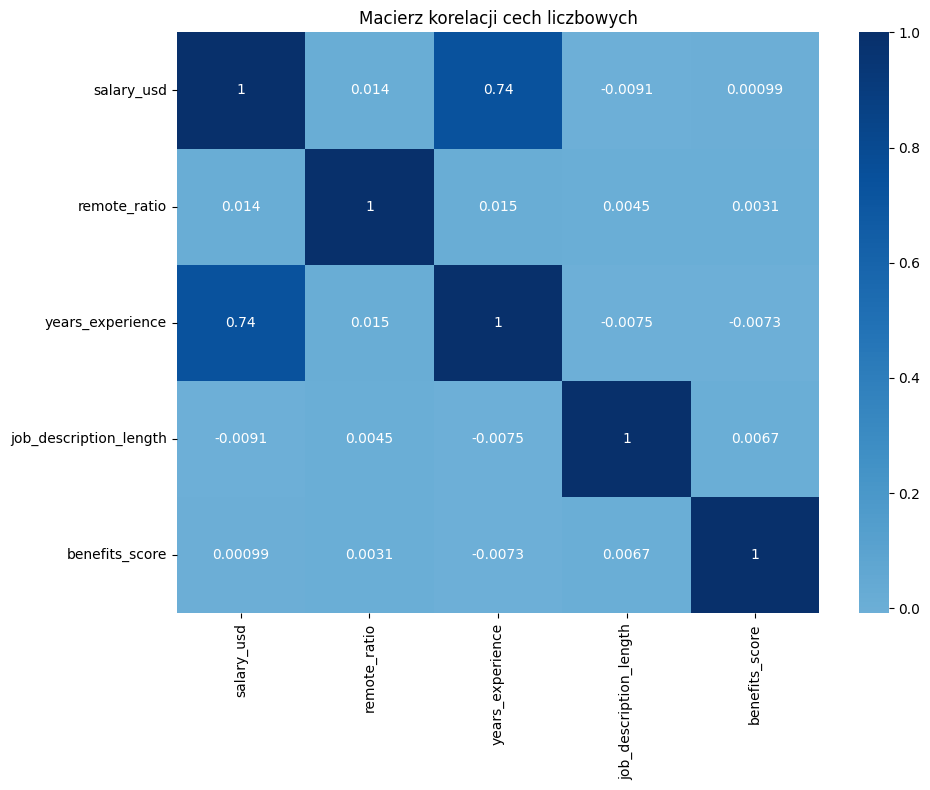

In [351]:
#Macierz korelacji cech liczbowych
plt.figure(figsize=(10, 8))
corr = df_cleaned.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='Blues', center=0)
plt.title('Macierz korelacji cech liczbowych')
plt.tight_layout()
plt.show()


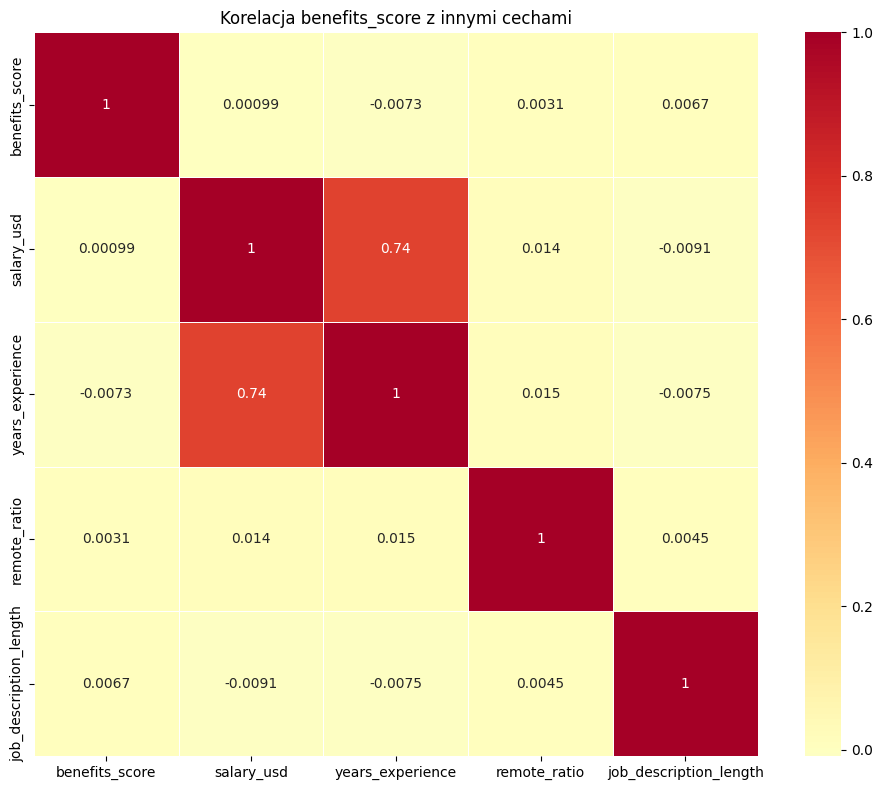

In [352]:
#Korelacja benefits_score z innymi cechami liczbowymi
numeric_cols = ['benefits_score', 'salary_usd', 'years_experience', 'remote_ratio', 'job_description_length']
correlation_matrix = df_cleaned[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu_r', center=0, 
            square=True, linewidths=0.5)
plt.title('Korelacja benefits_score z innymi cechami')
plt.tight_layout()
plt.show()


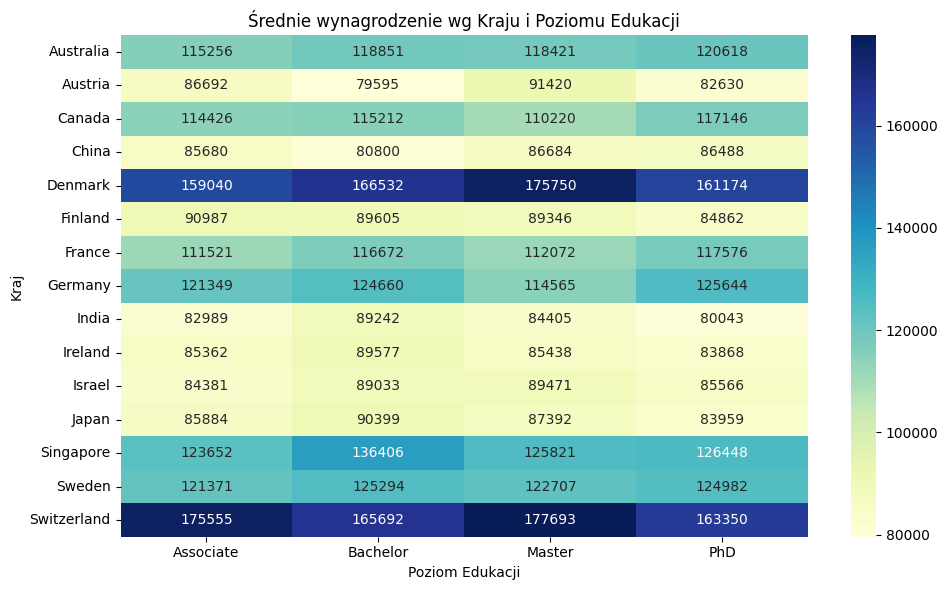

In [353]:
pivot = df_cleaned.pivot_table(
    values="salary_usd",
    index="company_location",
    columns="education_required",
    aggfunc="mean"
)

#Top 10 kraji 
top = df_cleaned["company_location"].value_counts().head(15).index
pivot = pivot.loc[pivot.index.isin(top)]

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Średnie wynagrodzenie wg Kraju i Poziomu Edukacji")
plt.xlabel("Poziom Edukacji")
plt.ylabel("Kraj")
plt.tight_layout()
plt.show()

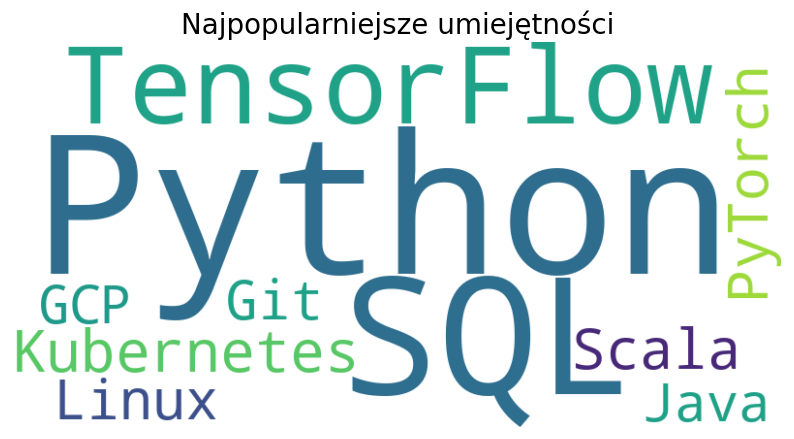

In [354]:
from wordcloud import WordCloud

#wordcloud najczęstszych skilli
all_skills = ', '.join(df_cleaned['required_skills'].dropna())

wordcloud = WordCloud(width=800,height=400, background_color='white', collocations=False,colormap='viridis',max_words=10).generate(all_skills)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Najpopularniejsze umiejętności', fontsize=20)
plt.show()


In [355]:
#Funkcja do detekcji wartości odstających metodą IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] < lower) | (data[column] > upper)]

#Detekcja outliers w wynagrodzeniu
outliers_salary = detect_outliers_iqr(df_cleaned, 'salary_usd')
print(f"Liczba wartości odstających w salary_usd: {len(outliers_salary)}")
print(f"Procent outliers: {len(outliers_salary)/len(df_cleaned)*100:.2f}%")

#outliers
if len(outliers_salary) > 0:
    print(f"\nStatystyki outliers:")
    print(f"Min: ${outliers_salary['salary_usd'].min():,}")
    print(f"Max: ${outliers_salary['salary_usd'].max():,}")
    print(f"Średnia: ${outliers_salary['salary_usd'].mean():,.0f}")


Liczba wartości odstających w salary_usd: 483
Procent outliers: 3.22%

Statystyki outliers:
Min: $261,046
Max: $399,095
Średnia: $298,761


In [356]:
#kluczowe staty
print(f"Całkowita liczba ofert: {len(df_cleaned):,}")
print(f"Średnie wynagrodzenie: ${df_cleaned['salary_usd'].mean():,.0f}")
print(f"Mediana wynagrodzenia: ${df_cleaned['salary_usd'].median():,.0f}")
print(f"Zakres wynagrodzeń: ${df_cleaned['salary_usd'].min():,.0f} - ${df_cleaned['salary_usd'].max():,.0f}")
print(f"Najczęstszy poziom doświadczenia: {df_cleaned['experience_level_full'].mode()[0]}")
print(f"Najczęstszy typ zatrudnienia: {df_cleaned['employment_type_full'].mode()[0]}")
print(f"Procent pracy w pełni zdalnej: {(df_cleaned['remote_ratio'] == 100).mean()*100:.1f}%")
print(f"Średni wiek doświadczenia: {df_cleaned['years_experience'].mean():.1f} lat")


Całkowita liczba ofert: 15,000
Średnie wynagrodzenie: $115,349
Mediana wynagrodzenia: $99,705
Zakres wynagrodzeń: $32,519 - $399,095
Najczęstszy poziom doświadczenia: Mid
Najczęstszy typ zatrudnienia: Full-time
Procent pracy w pełni zdalnej: 32.8%
Średni wiek doświadczenia: 6.3 lat


### Wnioski z eksploracyjnej analizy danych

1. **Rozkład wynagrodzeń**: Zarobki w branży AI są dość zróżnicowane - większość ludzi zarabia między 70-150 tysięcy dolarów rocznie, ale są też osoby z pensją powyżej 300 tysięcy. Średnia wynosi około 115 tysięcy, ale połowa zarabia mniej niż 100 tysięcy, co wskazuje na dużą różnorodność stanowisk i poziomów zaawansowania w branży AI.
2. **Poziomy doświadczenia**: Rozkład poziomów doświadczenia jest bardzo równomierny - Mid (3,781), Executive (3,760), Senior (3,741), Entry (3,718). Wykres liniowy z odchyleniem standardowym pokazuje wyraźną progresję wynagrodzeń wraz ze wzrostem poziomu doświadczenia, co potwierdza logiczną strukturę rynku pracy AI. Średni wiek doświadczenia wynosi 6.3 lat.
3. **Typy zatrudnienia**: Dominują oferty pracy na pełen etat (Full-time: 3,812 ofert, 25.4%), następnie Freelance (3,758, 25.1%), Contract (3,721, 24.8%) i Part-time (3,709, 24.7%). Rozkład jest bardzo równomierny, co wskazuje na dużą elastyczność form zatrudnienia w branży AI i różnorodność modeli współpracy.
4. **Praca zdalna**: 32.8% ofert to praca w pełni zdalna, co pokazuje wysoki poziom akceptacji pracy zdalnej w branży AI. Średnie wynagrodzenia są podobne niezależnie od trybu pracy (stacjonarna, hybrydowa, zdalna), co sugeruje, że praca zdalna nie wpływa negatywnie na wynagrodzenie i jest traktowana równorzędnie.
5. **Różnice geograficzne**: Najwyższe średnie wynagrodzenia oferują Szwajcaria, Dania, Norwegia i USA (powyżej $140,000). Niemcy prowadzą pod względem liczby ofert (około 700), następnie Dania, Francja i Kanada. Widoczne są znaczące różnice geograficzne w wynagrodzeniach, co odzwierciedla różnice w kosztach życia, dojrzałości rynków technologicznych i lokalnej konkurencji o talenty AI.
6. **Wartości odstające**: Zidentyfikowano 483 wartości odstających (3.22% danych) w wynagrodzeniach, z przedziału $261,046 - $399,095 (średnia $298,761). Te wysokie wynagrodzenia prawdopodobnie dotyczą stanowisk executive, specjalistycznych ról w dużych firmach technologicznych lub pozycji w krajach o wysokich kosztach życia. Korelacje między zmiennymi liczbowymi są generalnie słabe (poza years_experience vs salary_usd), co sugeruje, że wynagrodzenie zależy od kombinacji wielu czynników jednocześnie.

### Trenowanie Modelu

In [357]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


In [358]:
#Podział wynagrodzenia na 3 kategorie
def categorize_salary(salary):
    if salary < 85000:
        return 'Low'
    elif salary < 130000:
        return 'Medium'
    else:
        return 'High'

df_cleaned['salary_category'] = df_cleaned['salary_usd'].apply(categorize_salary)

# Sprawdzenie rozkładu klas
print("Rozkład kategorii wynagrodzeń:")
class_counts = df_cleaned['salary_category'].value_counts()
for category, count in class_counts.items():
    print(f"  {category}: {count} ({count/len(df_cleaned)*100:.1f}%)")


Rozkład kategorii wynagrodzeń:
  Low: 5647 (37.6%)
  High: 4789 (31.9%)
  Medium: 4564 (30.4%)


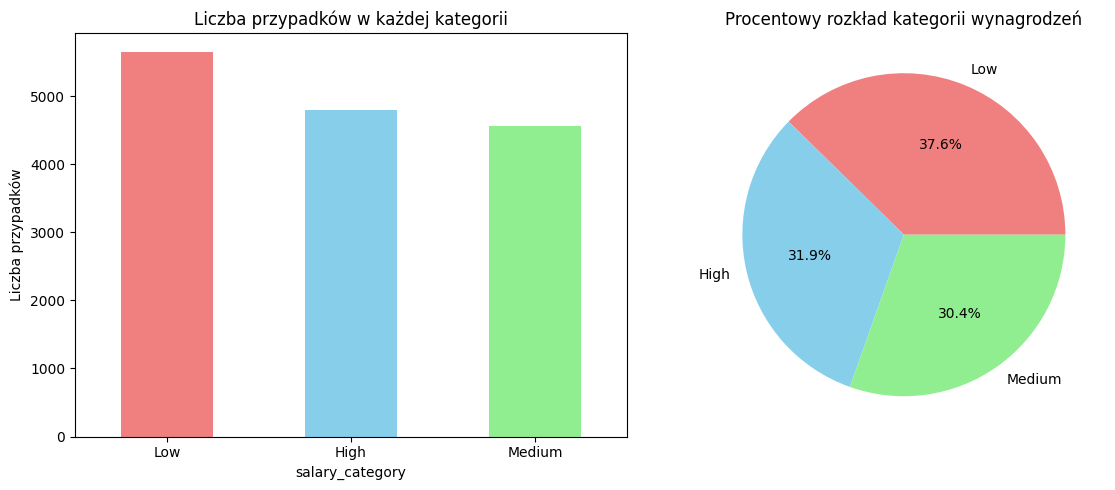

In [359]:
#Wizualizacja rozkładu kategorii
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#bar
class_counts.plot(kind='bar', ax=axes[0], color=['lightcoral', 'skyblue', 'lightgreen'])
axes[0].set_title('Liczba przypadków w każdej kategorii')
axes[0].set_ylabel('Liczba przypadków')
axes[0].tick_params(axis='x', rotation=0)

#pie chart
axes[1].pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%',
            colors=['lightcoral', 'skyblue', 'lightgreen'])
axes[1].set_title('Procentowy rozkład kategorii wynagrodzeń')

plt.tight_layout()
plt.show()


In [360]:
#Encoding zmiennych kategorycznych
categorical_features = ['job_title', 'experience_level', 'employment_type',
                       'company_location', 'company_size', 'industry',
                       'education_required']

for col in categorical_features:
    if col in df_cleaned.columns:
        if col + '_encoded' not in df_cleaned.columns:
            le = LabelEncoder()
            df_cleaned[col + '_encoded'] = le.fit_transform(df_cleaned[col])

#Target variable
le_target = LabelEncoder()
y = le_target.fit_transform(df_cleaned['salary_category'])
print(f"Mapowanie klas: {dict(zip(le_target.classes_, range(len(le_target.classes_))))}")

#Features)
feature_cols = [col + '_encoded' for col in categorical_features if col in df_cleaned.columns] + \
               ['years_experience', 'remote_ratio', 'benefits_score']
existing_features = [col for col in feature_cols if col in df_cleaned.columns]
X = df_cleaned[existing_features]

print(f"Liczba cech: {X.shape[1]}")
print(f"Liczba próbek: {X.shape[0]}")
print(f"Liczba klas: {len(np.unique(y))}")


Mapowanie klas: {'High': 0, 'Low': 1, 'Medium': 2}
Liczba cech: 10
Liczba próbek: 15000
Liczba klas: 3


In [361]:
#Podział danych ze stratyfikacją
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Rozmiary zbiorów: Train={X_train.shape}, Test={X_test.shape}")


Rozmiary zbiorów: Train=(12000, 10), Test=(3000, 10)


In [362]:
#Cross-validation 
rf_base = RandomForestClassifier(n_estimators=100, random_state=42)

# Testowanie na 5 foldach z różnymi metrykami
cv_scores = cross_val_score(rf_base, X, y, cv=5, scoring='accuracy')
print(f"Cross-validation Accuracy: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

# F1-score
cv_f1 = cross_val_score(rf_base, X, y, cv=5, scoring='f1_macro')
print(f"Cross-validation F1-score: {cv_f1.mean():.3f} (+/- {cv_f1.std() * 2:.3f})")

# Precision
cv_precision = cross_val_score(rf_base, X, y, cv=5, scoring='precision_macro')
print(f"Cross-validation Precision: {cv_precision.mean():.3f} (+/- {cv_precision.std() * 2:.3f})")

# Recall
cv_recall = cross_val_score(rf_base, X, y, cv=5, scoring='recall_macro')
print(f"Cross-validation Recall: {cv_recall.mean():.3f} (+/- {cv_recall.std() * 2:.3f})")


Cross-validation Accuracy: 0.804 (+/- 0.008)
Cross-validation F1-score: 0.797 (+/- 0.008)
Cross-validation Precision: 0.796 (+/- 0.008)
Cross-validation Recall: 0.798 (+/- 0.008)


In [363]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, scoring='f1_macro', n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV F1-score: {grid_search.best_score_:.3f}")

# Ewaluacja na zbiorze testowym
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)



Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best CV F1-score: 0.794


In [364]:
#Metryki klasyfikacji
accuracy = accuracy_score(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred, average='macro')
precision_macro = precision_score(y_test, y_pred, average='macro')
recall_macro = recall_score(y_test, y_pred, average='macro')

print(f"Metryki modelu klasyfikacji:")
print(f"Accuracy (dokładność): {accuracy:.3f} ({accuracy*100:.1f}%)")
print(f"Precision (macro): {precision_macro:.3f}")
print(f"Recall (macro): {recall_macro:.3f}")
print(f"F1-score (macro): {f1_macro:.3f}")

class_names = ['Low', 'Medium', 'High']

Metryki modelu klasyfikacji:
Accuracy (dokładność): 0.809 (80.9%)
Precision (macro): 0.802
Recall (macro): 0.803
F1-score (macro): 0.802


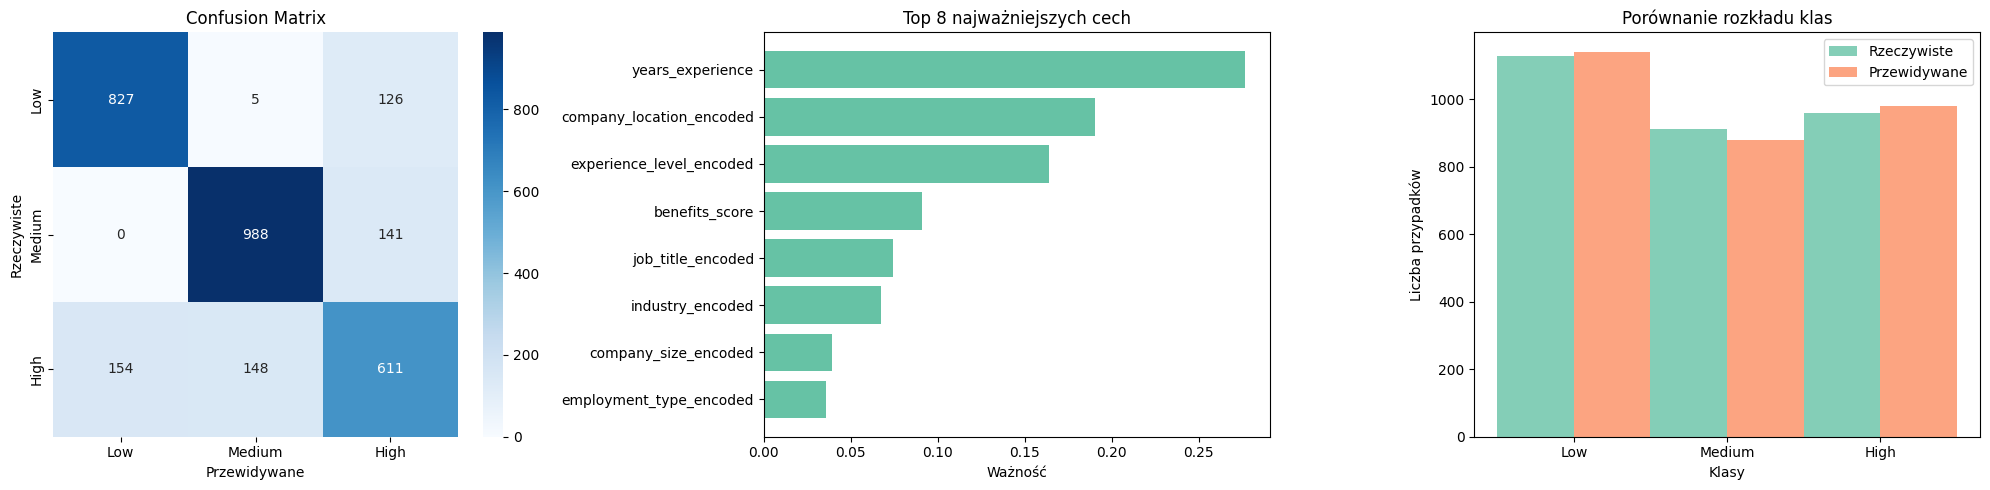

In [365]:
# Confusion Matrix - główna wizualizacja dla klasyfikacji
cm = confusion_matrix(y_test, y_pred)

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# 1. Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names, ax=axes[0])
axes[0].set_title('Confusion Matrix')
axes[0].set_xlabel('Przewidywane')
axes[0].set_ylabel('Rzeczywiste')

# 2. Feature Importance
feature_importance = pd.DataFrame({
    'feature': existing_features,
    'importance': best_rf.feature_importances_
}).sort_values('importance', ascending=True)

axes[1].barh(feature_importance['feature'][-8:], feature_importance['importance'][-8:])
axes[1].set_title('Top 8 najważniejszych cech')
axes[1].set_xlabel('Ważność')

# 3. Porównanie rzeczywistych vs przewidywanych
pred_counts = pd.Series(y_pred).map({0: 'High', 1: 'Low', 2: 'Medium'}).value_counts()
real_counts = pd.Series(y_test).map({0: 'High', 1: 'Low', 2: 'Medium'}).value_counts()

x = np.arange(len(class_names))
width = 0.5
axes[2].bar(x - width/2, [real_counts.get(cls, 0) for cls in class_names], 
            width, label='Rzeczywiste', alpha=0.8)
axes[2].bar(x + width/2, [pred_counts.get(cls, 0) for cls in class_names], 
            width, label='Przewidywane', alpha=0.8)
axes[2].set_xlabel('Klasy')
axes[2].set_ylabel('Liczba przypadków')
axes[2].set_title('Porównanie rozkładu klas')
axes[2].set_xticks(x)
axes[2].set_xticklabels(class_names)
axes[2].legend()

plt.tight_layout()
plt.show()


## Sprawozdanie Rafał Perfikowski: AI Job Market Analysis
### 1. Opis danych i motywacja
W projekcie wykorzystano zbiór danych „Global AI Job Market & Salary Trends 2025”, obejmujący 15 000 ofert pracy z branży sztucznej inteligencji, zebranych w latach 2024–2025 z platform takich jak LinkedIn, Indeed i Glassdoor. Dane zawierają szczegółowe informacje o stanowiskach, wynagrodzeniach (w USD), wymaganych umiejętnościach, poziomie doświadczenia, trybie pracy, wielkości firmy, lokalizacji oraz innych atrybutach.
Motywacja:
Wybrałem ten zbiór, ponieważ pozwala analizować aktualne trendy na globalnym rynku pracy AI, przydatnych dla kandydatów i rekruterów. A klasyfikacja wynagrodzenia może się przydać każdemi - jest to pierwesze co rzuca się w oczy podczas szukania pracy.

### 2. Przygotowanie danych
Czyszczenie i selekcja cech:
Usunięto kolumny nieprzydatne do predykcji (job_id, posting_date, application_deadline, salary_currency), ponieważ nic nie wnosiły albo były redundantne (np. salary_currency przy obecności salary_usd).
Przekształcenia:
•	Skróty w kolumnach kategorycznych zamieniono na pełne nazwy (np. EN → Entry).
•	Wynagrodzenie podzielono na trzy kategorie: Low (<85 000 USD), Medium (85 000–130 000 USD), High (>130 000 USD). Co pozwala na klasyfikacje.
•	Zmiennych kategorycznych użyto po zakodowaniu (LabelEncoder), co jest standardem przy modelach opartych na drzewkach.

Podział danych:
Dane podzielono na zbiór treningowy (80%, 12 000 próbek) i testowy (20%, 3 000 próbek) ze stratyfikacją klas, aby zachować proporcje klas w obu zbiorach.

### 3. Wybór modelu i uzasadnienie
Random Forest Classifier
•	Random Forest to uniwersalny, bardzo skuteczny model dla klasyfikacji tablicowych danych, szczególnie gdy cechy są mieszane (liczbowe i kategoryczne).
•	Jest odporny na nadmierne dopasowanie (overfitting) dzięki losowości i agregacji wielu drzew decyzyjnych.
•	Nie wymaga standaryzacji cech ani specjalnego przygotowania zmiennych kategorycznych (wystarczy label encoding).
•	Inne algorytmy, jak SVM czy regresja logistyczna, gorzej radzą sobie z dużą liczbą cech kategorycznych i nie dają takiej interpretowalności. Sieci neuronowe wymagają większych zbiorów i dłuższego strojenia.

### 4. Dobór hiperparametrów
Hiperparametry dobrano za pomocą GridSearchCV (5-fold cross-validation), testując:
•	Liczbę drzew (n_estimators): 100, 200, 300
•	Maksymalną głębokość drzewa (max_depth): None, 10, 20, 30
•	Minimalną liczbę próbek do podziału (min_samples_split): 2, 5, 10
•	Minimalną liczbę próbek w liściu (min_samples_leaf): 1, 2, 4
•	Liczbę cech do rozważenia przy podziale (max_features): 'auto', 'sqrt', 'log2'

GridSearchCV pozwala systematycznie przetestować wiele kombinacji parametrów i wybrać te, które dają najlepszy wynik (tu: F1-score macro), minimalizując ryzyko przypadkowego wyboru.
Najlepsze parametry:
•	n_estimators: 300
•	max_depth: 20
•	min_samples_split: 2
•	min_samples_leaf: 1
•	max_features: 'sqrt'

### 5. Trenowanie i testowanie modelu
Model Random Forest został wytrenowany na zbiorze treningowym z najlepszymi hiperparametrami.
Wydajność oceniano zarówno na zbiorze testowym, jak i przy użyciu walidacji krzyżowej.

### 6. Miary oceny modelu i interpretacja
Dlaczego te metryki?
•	Accuracy – ogólna skuteczność, ale przy nierównych klasach może być myląca.
•	Precision, Recall, F1-score (macro) – lepiej oddają skuteczność przy klasyfikacji wieloklasowej i nierównych klasach, bo każda klasa jest traktowana równoważnie.
•	Confusion Matrix – pozwala zobaczyć, które klasy są najczęściej mylone.
Wyniki cross-validation (5-fold):
•	Accuracy: 0.804 ± 0.008
•	F1-score: 0.797 ± 0.008
•	Precision: 0.796 ± 0.008
•	Recall: 0.798 ± 0.008
Wyniki na zbiorze testowym:
•	Accuracy: 0.809 (80.9%)
•	Precision (macro): 0.802
•	Recall (macro): 0.803
•	F1-score (macro): 0.802
Interpretacja:
Model dobrze rozróżnia klasy, a wyniki są zbalansowane. Najważniejsze cechy według modelu to: lata doświadczenia, lokalizacja firmy, poziom doświadczenia, benefits_score i stanowisko.

### 7. Ocena skuteczności i przydatności modelu
Model osiąga wysoką skuteczność i może być używany do automatycznej kategoryzacji ofert pracy według poziomu wynagrodzenia. Jest przydatny dla rekruterów i kandydatów do szybkiej oceny rynku. Wyniki są stabilne i interpretowalne, a model dobrze radzi sobie z różnorodnością danych.
